# Face Recognition 

#### Importamos Librerias

In [1]:
import os 
import pandas as pd
import numpy as np
import tensorflow as ts
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Extraemos datos

In [2]:
dataDir = 'dataset/part1/part1/'
listImages = os.listdir(dataDir)

map_characters = {
    0: 'Male',
    1: 'Female'
}


#### Creamos el Dataset

In [3]:
images = []
ages = []
genders = []



for filename in listImages:
    file = filename.split('_')
    age = file[0]
    gender = file[1]
    ages.append(age)
    genders.append(gender)
    if filename.endswith('.jpg'):
        filePath = os.path.join(dataDir,filename)
        image = cv2.imread(filePath)
        if image is None:
            print(f"Error al leer la imagen: {filePath}")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image= cv2.resize(image, (64,64))
        images.append(image)
    # file  = image_file.split('_')
    # age, gender, race = file[0], file[1], file[2]
    # data.append((image_file, int(age), int(gender)))
print(images)

[array([[230, 234, 234, ..., 227, 227, 226],
       [234, 227, 234, ..., 228, 228, 227],
       [234, 233, 228, ..., 223, 227, 227],
       ...,
       [253, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[170, 180, 191, ..., 169, 193, 202],
       [171, 188, 189, ..., 179, 182, 204],
       [124, 117, 106, ..., 160, 198, 192],
       ...,
       [ 39,  44,  45, ...,  70,  81,  94],
       [ 46, 129,  86, ...,  95,  92, 109],
       [ 60, 127, 102, ..., 118, 102,  97]], dtype=uint8), array([[86, 73, 86, ...,  0,  1, 10],
       [77, 83, 88, ...,  0,  1,  1],
       [56, 86, 98, ...,  0,  0,  5],
       ...,
       [38, 55, 48, ...,  5,  0,  2],
       [46, 51, 73, ...,  6,  0,  1],
       [27, 68, 69, ...,  5,  5, 10]], dtype=uint8), array([[245, 243, 243, ..., 255, 255, 255],
       [243, 242, 241, ..., 255, 255, 255],
       [241, 240, 240, ..., 255, 255, 255],
       ...,
       [213, 211, 

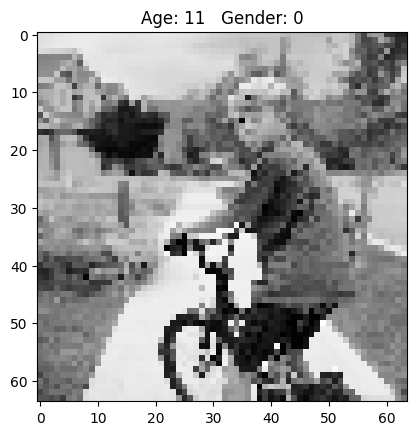

In [4]:
position = 155
if images:
    plt.title(f'Age: {ages[position]}   Gender: {genders[position]}')
    plt.imshow(images[position], cmap='gray')
    plt.show()

#### Preprocesamiento

In [5]:
# Convertimos a un array de numpy
images = np.array(images)
ages = np.array(ages, dtype=int)
genders = np.array(genders, dtype=int)

# Normalizamos de las imagenes
images = images / 255


In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, genders, test_size=0.2, random_state=42)

# Construir un modelo simple de clasificación con TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(64,64,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Supongo que tienes dos géneros
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc}")


Epoch 1/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.5695 - loss: 0.6775 - val_accuracy: 0.6302 - val_loss: 0.6434
Epoch 2/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.6364 - loss: 0.6302 - val_accuracy: 0.6499 - val_loss: 0.6169
Epoch 3/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.6722 - loss: 0.6007 - val_accuracy: 0.6524 - val_loss: 0.6174
Epoch 4/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.6915 - loss: 0.5700 - val_accuracy: 0.6760 - val_loss: 0.5804
Epoch 5/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7227 - loss: 0.5349 - val_accuracy: 0.6948 - val_loss: 0.5721
Epoch 6/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.7355 - loss: 0.5130 - val_accuracy: 0.7002 - val_loss: 0.5562
Epoch 7/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7540 - loss: 0.4915 - val_accuracy: 0.6997 - val_loss: 0.5672
Epoch 8/15
254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.7733 - loss: 0.4475 - 

#### Creamos los conjuntos de entrenamiento y test

#### Creamos la arquitectura del modelo CNN



In [2]:
import cv2
import numpy as np
import tensorflow as tf

# Función para capturar una imagen desde la cámara
def capture_image():
    cap = cv2.VideoCapture(0)  # Usa la cámara 0
    if not cap.isOpened():
        print("Error: No se puede abrir la cámara")
        return None
    
    ret, frame = cap.read()
    cap.release()
    if not ret:
        print("Error: No se puede capturar la imagen")
        return None
    
    return frame

# Función para preprocesar la imagen
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (64, 64))
    image = image / 255.0  # Normaliza la imagen
    image = np.expand_dims(image, axis=-1)  # Añadir dimensión para el canal
    image = np.expand_dims(image, axis=0)  # Añadir dimensión para el batch
    return image

# Capturar imagen desde la cámara
captured_image = capture_image()
if captured_image is not None:
    # Preprocesar la imagen capturada
    preprocessed_image = preprocess_image(captured_image)
    
    # Realizar la predicción
    prediction = model.predict(preprocessed_image)
    predicted_gender = "Hombre" if prediction[0] > 0.5 else "Mujer"
    print(f"Predicción: {predicted_gender}")
    
    # Mostrar la imagen capturada con la predicción
    cv2.putText(captured_image, predicted_gender, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Imagen Capturada', captured_image)
    cv2.waitKey(0)
    


NameError: name 'model' is not defined